# **<font color="green">START CODING**

In [45]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import sys
# import os
# from pathlib import Path
# from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report




**Practical Steps for Using T4 GPU in Colab:**

    Enable GPU in Colab: Make sure to select the GPU runtime in Google Colab.
        Go to Runtime > Change runtime type.
        Select GPU from the Hardware accelerator dropdown menu.
        Click Save.

**Mount Google Drive**

In [46]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **DATASETS**

<font color="red">**Cancerous images**
<pre>
<font color="red">lung_aca      Adenocarcinoma (ACA)            5000 images

<font color="red">lung_scc      Squamous Cell Carcinoma (SCC)   5000 images

<font color="red">lung_aca_scc  ACA & SCC                      10000 images

<font color="red">colon_aca     ACA                             5000 images
</pre>


<font color="green">**Benign images**
<pre>
<font color="green">lung_n        Benign tissue                   5000 images

<font color="green">colon_n       Benign tissue                   5000 images
</pre>

# **STRATEGIES**

To achieve different analysis strategies as mentioned, you will need to create separate setups for training and validation generators.
We distinguish between cancerous and benign images in different ways and also differentiate between the two types of lung cancer.

Adjust the epochs, batch size, and other parameters as necessary for your specific needs.

# **<font color="blue">Strategy 1:</font> Differentiate between <font color="red">lung_aca_scc</font> and <font color="green">lung_n</font>**

    Uses a categorical classification approach.
    The classes specified are ['lung_aca_scc', 'lung_n'].
    Uses class_mode='categorical' and a final dense layer with two neurons and softmax activation for multi-class classification.

# **<font color="blue">Strategy 2:</font> Differentiate between <font color="red">lung_aca</font> and <font color="red">lung_scc</font>**

    Uses a categorical classification approach.
    The classes specified are ['lung_aca', 'lung_scc'].
    Uses class_mode='categorical' and a final dense layer with two neurons and softmax activation for multi-class classification.

# **<font color="blue">Strategy 3:</font> Differentiate between <font color="red">lung_aca</font> and <font color="green">lung_n</font>**

    Uses a categorical classification approach.
    The classes specified are ['lung_aca', 'lung_n'].
    Uses class_mode='categorical' and a final dense layer with two neurons and softmax activation for multi-class classification.

# **<font color="blue">Strategy 4:</font> Differentiate between <font color="red">lung_scc</font> and <font color="green">lung_n</font>**

    Uses a categorical classification approach.
    The classes specified are ['lung_scc', 'lung_n'].
    Uses class_mode='categorical' and a final dense layer with two neurons and softmax activation for multi-class classification.

# **<font color="blue">Strategy 5:</font> Differentiate between <font color="red">colon_aca</font> and <font color="green">colon_n</font>**

    Uses a categorical classification approach.
    The classes specified are ['colon_aca', 'colon_n'].
    Uses class_mode='categorical' and a final dense layer with two neurons and softmax activation for multi-class classification.

In [47]:
# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Specify the path to the dataset by pointing to the parent folder that contains the subfolders with the images
# dataset_path = '/content/drive/MyDrive/DATA_SCIENCE/FINAL___PROJECT___SUCCESS/analyze_lung_colon_cancer_histopathological_images___IMAGE_DATASET/lung_colon_image_set/lung_image_sets/STRATEGY_1'
# dataset_path = '/content/drive/MyDrive/DATA_SCIENCE/FINAL___PROJECT___SUCCESS/analyze_lung_colon_cancer_histopathological_images___IMAGE_DATASET/lung_colon_image_set/lung_image_sets/STRATEGY_2'
# dataset_path = '/content/drive/MyDrive/DATA_SCIENCE/FINAL___PROJECT___SUCCESS/analyze_lung_colon_cancer_histopathological_images___IMAGE_DATASET/lung_colon_image_set/lung_image_sets/STRATEGY_3'
# dataset_path = '/content/drive/MyDrive/DATA_SCIENCE/FINAL___PROJECT___SUCCESS/analyze_lung_colon_cancer_histopathological_images___IMAGE_DATASET/lung_colon_image_set/lung_image_sets/STRATEGY_4'
dataset_path = '/content/drive/MyDrive/DATA_SCIENCE/FINAL___PROJECT___SUCCESS/analyze_lung_colon_cancer_histopathological_images___IMAGE_DATASET/lung_colon_image_set/colon_image_sets/STRATEGY_5'

Num GPUs Available:  1


**IMPORT DATA**

In [48]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    seed = 11111,
    shuffle = True,
    image_size = (150, 150),
    batch_size = 32
)

Found 10000 files belonging to 2 classes.


In [49]:
classes_name = dataset.class_names
classes_name

['colon_aca', 'colon_n']

**EXAMPLES OF IMAGES**

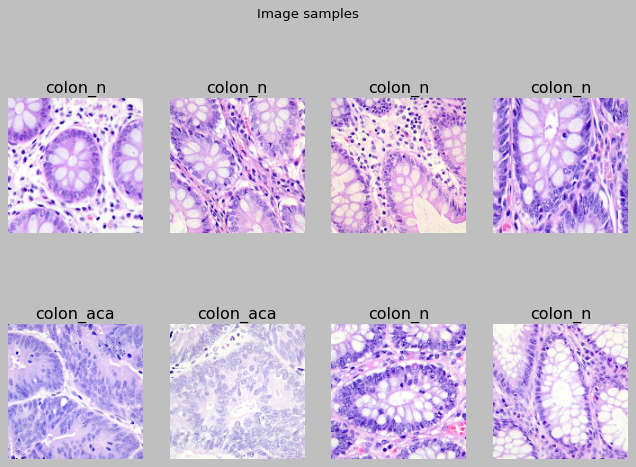

In [50]:
plt.figure(figsize=(10, 10))
plt.suptitle('Image samples')

for batch_img, batch_label in dataset.take(1):
   for i in range(8):
      ax = plt.subplot(3, 4, i + 1)
      plt.title(classes_name[batch_label[i]])
      plt.imshow(batch_img[i].numpy().astype('uint8'))
      plt.axis('off')

**DATA PREPARATION - SPLIT, CACHE, SHUFFLE and PREFETCH**

In [51]:
def split_data(dataset, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size=10000):
   assert(train_split + val_split + test_split) == 1


   if shuffle:
      dataset = dataset.shuffle(shuffle_size, seed=11111)
   train_size = int(train_split * len(dataset))
   val_size = int(val_split * len(dataset))
   test_size = int(test_split * len(dataset))


   train_ds = dataset.take(train_size)
   val_ds = dataset.skip(train_size).take(val_size)
   test_ds = dataset.skip(train_size+val_size).take(test_size)


   return train_ds, val_ds, test_ds

In [52]:
train, val ,test = split_data(dataset)

In [53]:
print(len(train))
print(len(test))
print(len(val))

250
31
31


In [54]:
train_ds = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

**BUILD MODEL**

In [55]:
# Building a simple CNN model for classification
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),  # Input layer with image dimensions
    # tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),  # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'),  # First convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),  # Max-pooling layer to reduce dimensions
    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'),  # Second convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),  # Max-pooling layer
    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'),  # Third convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),  # Max-pooling layer
    tf.keras.layers.Conv2D(256, (3, 3), padding = 'same', activation='relu'),  # Fourth convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),  # Max-pooling layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),  # Flatten the feature maps
    tf.keras.layers.Dense(512, activation='relu'),  # Fully connected layer with 512 units
    tf.keras.layers.Dense(2, activation='softmax')  # Output layer for categorical classification
])

In [56]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 9, 9, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      10,617,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,007,810 (41.99 MB)

 Trainable params: 11,007,298 (41.99 MB)

 Non-trainable params: 512 (2.00 KB)

In [57]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = 'logs')
checkpoint = tf.keras.callbacks.ModelCheckpoint("cancer.keras", monitor="val_loss", save_best_only=True, mode="auto", verbose = 1)
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto', verbose = 1)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [58]:
# cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])          # TS - initial variant
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [59]:
# history = cnn_model.fit(train_ds, validation_data = val_ds, epochs = 10, batch_size = 32, verbose = 1,
#              callbacks=[tensorboard, checkpoint, early_stopping, reduce_lr_on_plateau])

# history = cnn_model.fit(train_ds, validation_data = val_ds, epochs = 20, batch_size = 32, verbose = 1,
#              callbacks=[tensorboard, checkpoint, early_stopping, reduce_lr_on_plateau])

history = cnn_model.fit(train_ds, validation_data = val_ds, epochs = 40, batch_size = 32, verbose = 1,
             callbacks=[tensorboard, checkpoint, early_stopping, reduce_lr_on_plateau])


Epoch 1/40
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8046 - loss: 1.4038
Epoch 1: val_loss improved from inf to 99.07686, saving model to cancer.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 558s 131ms/step - accuracy: 0.8051 - loss: 1.3967 - val_accuracy: 0.4990 - val_loss: 99.0769 - learning_rate: 0.0010
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9266 - loss: 0.1959
Epoch 2: val_loss improved from 99.07686 to 31.19109, saving model to cancer.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9267 - loss: 0.1958 - val_accuracy: 0.4990 - val_loss: 31.1911 - learning_rate: 0.0010
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9469 - loss: 0.1460
Epoch 3: val_loss improved from 31.19109 to 23.40039, saving model to cancer.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9469 - loss: 0.1460 - val_accuracy: 0.5242 - val_loss: 23.4004 - learning_rate: 0.0010
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy

**EVALUATION**

In [60]:
train_score = cnn_model.evaluate(train_ds, verbose= 1)
val_score = cnn_model.evaluate(val_ds, verbose= 1)
test_score = cnn_model.evaluate(test_ds, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Val Loss: ", val_score[0])
print("Val Accuracy: ", val_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9999 - loss: 0.0013
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9979 - loss: 0.0134
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9986 - loss: 0.0074
Train Loss:  0.0012777356896549463
Train Accuracy:  0.999749481678009
--------------------
Val Loss:  0.009261605329811573
Val Accuracy:  0.9979838728904724
--------------------
Test Loss:  0.005203577224165201
Test Accuracy:  0.9989919066429138


**MODEL PERFORMANCE**

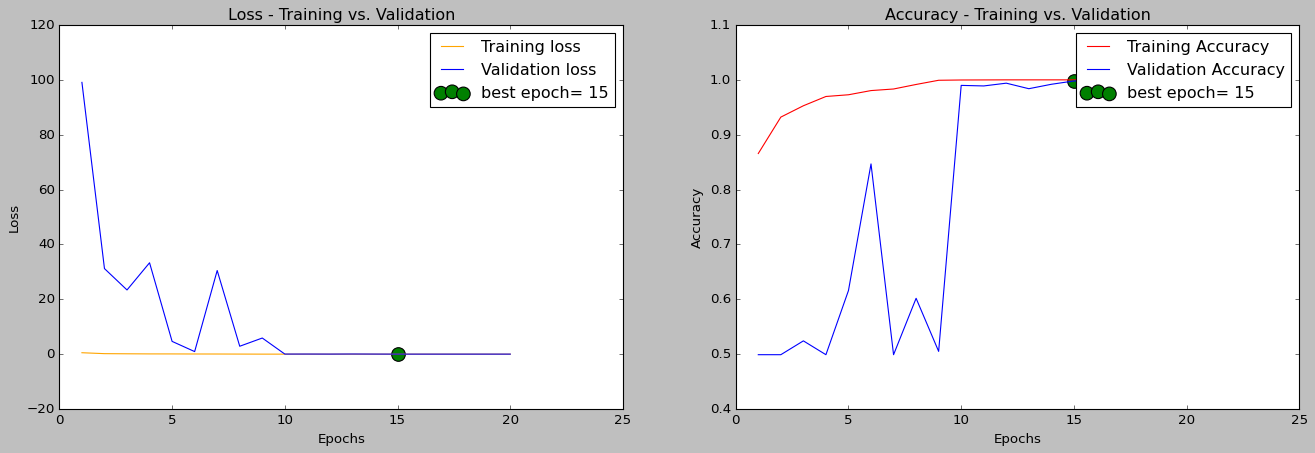

In [61]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 6))
plt.style.use('classic')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'orange', label= 'Training loss')
plt.plot(Epochs, val_loss, 'blue', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s = 150, c= 'green', label = loss_label)
plt.title('Loss - Training vs. Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'red', label = 'Training Accuracy')
plt.plot(Epochs, val_acc, 'blue', label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s = 150, c= 'green', label = acc_label)
plt.title('Accuracy - Training vs. Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [62]:
def display_conf_matrix():
    all_true_labels = []
    all_predicted_labels = []
    classes_name=dataset.class_names
    for image_batch, label_batch in test_ds:
        # Make predictions on the batch
        predictions = cnn_model.predict(image_batch)

        # Convert predictions to class indices
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = label_batch

        all_true_labels.extend(true_labels)
        all_predicted_labels.extend(predicted_labels)

    # Convert lists
    all_true_labels = np.array(all_true_labels)
    all_predicted_labels = np.array(all_predicted_labels)

    # Confusion matrix
    conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)
    print(classification_report(all_true_labels, all_predicted_labels))

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdYlBu', xticklabels=classes_name, yticklabels=classes_name)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

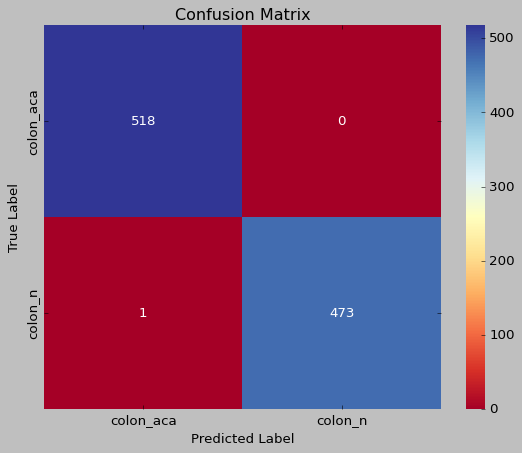

In [63]:
display_conf_matrix()

**PREDICTIONS**

In [64]:
def get_predictions():
    all_true_labels = []
    all_predicted_labels = []
    all_images = []

    # Get class names from the global dataset object
    class_names = dataset.class_names

    # Get all the predictions and true labels from the test dataset
    for image_batch, label_batch in test_ds:
        # Make predictions on the batch
        predictions = cnn_model.predict(image_batch)

        # Convert predictions to class indices (argmax gives the index of the class with the highest probability)
        predicted_labels = np.argmax(predictions, axis=1)

        # Append image batch, true labels, and predicted labels to respective lists
        all_images.extend(image_batch)
        all_true_labels.extend(label_batch.numpy())  # Convert tensor to numpy array
        all_predicted_labels.extend(predicted_labels)

    # Plot the predictions for the first 8 images
    plt.figure(figsize=(20, 20))  # Adjust the figure size for a 4x2 grid (8 images)
    plt.suptitle('Prediction of Cancer')

    # Loop over the first 8 images to display them
    num_images_to_display = 8  # We want to display 8 images
    for index in range(num_images_to_display):
        # Create a subplot in a 4x2 grid
        ax = plt.subplot(4, 2, index + 1)

        # Determine the color of the title based on whether the prediction is correct or not
        color = 'green' if all_true_labels[index] == all_predicted_labels[index] else 'red'

        # Set the title for each image with the true and predicted class
        plt.title(
            f'true_class: {class_names[all_true_labels[index]]}\n'
            f'predicted_class: {class_names[all_predicted_labels[index]]}',
            color=color,
            fontsize=20  # Adjust font size to prevent overlap
        )

        # Display the image
        plt.imshow(np.array(all_images[index]).astype('uint8'))  # Ensure proper data type for the image
        plt.axis('off')  # Hide axis

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
    plt.show()


In [65]:
get_predictions()

**STORE THE MODEL WITH PICKLE**

In [66]:
# store the model
import pickle
from pathlib import Path
from datetime import datetime

# Get the current date and time
current_time = datetime.now()

# Format the date and time as a string
formatted_time = current_time.strftime('%Y-%m-%d_%H%M%S')

pickle.dump(cnn_model,
            open(file = f'/content/drive/MyDrive/DEEP_LEARNING___MODELS/model___STRATEGY_5___40_epochs___4_convLayers___{formatted_time}.sav',
                 mode = 'wb'))